In [1]:
import word2vec
import numpy as np
np.set_printoptions(threshold=np.nan, precision=5, suppress=True)
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [2]:
with open ('drugbank_words_all_count', 'rb') as fp:
    count = word2vec.pickle.load(fp)
all_words = [pair[0] for pair in count]
with open ('drugbank_words_all_reverse_dictionary_filter_concatenated_drug_names_all_100', 'rb') as fp:
    reverse_dictionary = word2vec.pickle.load(fp)
with open('drug_names_all_100', 'rb') as fp:
    drug_names = word2vec.pickle.load(fp)
with open('concatenated_drug_names_all_100', 'rb') as fp:
    concatenated_drug_names = word2vec.pickle.load(fp)
vocabulary_size = len(reverse_dictionary)
vocabulary_size

95

In [3]:
labels = []
new_reverse_dictionary = {}
for index, word in reverse_dictionary.items():
    drug = drug_names[concatenated_drug_names.index(word)]
    word_count = count[all_words.index(word)][1]
    new_reverse_dictionary[index] = drug
    labels.append(drug)
    print(str(index) + ' ' + drug + ' ' + str(word_count))


0 Cyclosporine 3349
1 Trastuzumab 1239
2 Etanercept 1210
3 Peginterferon alfa-2b 960
4 Bivalirudin 890
5 Lepirudin 888
6 Aldesleukin 805
7 Streptokinase 800
8 Octreotide 753
9 Abciximab 732
10 Becaplermin 700
11 Hyaluronidase 690
12 Insulin Glargine 666
13 Goserelin 664
14 Insulin Lispro 664
15 Leuprolide 660
16 Gramicidin D 561
17 Desmopressin 516
18 Rituximab 512
19 Insulin Pork 467
20 Insulin Human 409
21 Eptifibatide 341
22 Tositumomab 317
23 Ibritumomab tiuxetan 282
24 Botulinum Toxin Type A 275
25 Botulinum Toxin Type B 273
26 Urokinase 267
27 Alteplase 259
28 Pegvisomant 259
29 Drotrecogin alfa 257
30 Anistreplase 256
31 Tenecteplase 256
32 Reteplase 255
33 Alpha-1-proteinase inhibitor 218
34 Glucagon recombinant 161
35 Secretin 149
36 Adalimumab 109
37 Infliximab 96
38 Alemtuzumab 94
39 Anakinra 92
40 Gemtuzumab ozogamicin 92
41 Pegaspargase 86
42 Cetuximab 71
43 Vasopressin 65
44 Somatropin recombinant 62
45 Muromonab 57
46 Efalizumab 55
47 Asparaginase 53
48 Basiliximab 53
49

In [4]:
final_embeddings_32_4_2 = np.load('final_embeddings_all_skip-gram_32_4_2_filter_concatenated_drug_names_all_100.npy')
Z_32_4_2 = np.load('final_embeddings_all_skip-gram_32_4_2_filter_concatenated_drug_names_all_100_linkage_ward.npy')

In [5]:
W_32_4_2 = []
for z in Z_32_4_2:
    w = []
    if z[0] < vocabulary_size:
        w.append(new_reverse_dictionary[int(z[0])])
    else:
        w.append(z[0])
    if z[1] < vocabulary_size:
        w.append(new_reverse_dictionary[int(z[1])])
    else:
        w.append(z[1])
    w.append(z[2])
    W_32_4_2 += [w]
    print(w)

['Agalsidase beta', 'Salmon Calcitonin', 0.21868668893949883]
['Anti-thymocyte Globulin (Rabbit)', 'Coagulation Factor IX (Recombinant)', 0.22885715078407001]
['Sargramostim', 'Sermorelin', 0.25723239923996244]
['Thyrotropin Alfa', 96.0, 0.26770822594591531]
['Interferon Alfa-2a, Recombinant', 'Satumomab Pendetide', 0.27633180810275249]
['Rasburicase', 'Collagenase clostridium histolyticum', 0.27816108233485443]
['Lutropin alfa', 'Serum albumin', 0.28664100269970327]
['Alglucerase', 95.0, 0.28885897022403767]
['Pegaspargase', 100.0, 0.29647045199189526]
['Follitropin beta', 101.0, 0.30209107636660809]
['Laronidase', 'Felypressin', 0.30867079342846976]
['Interferon gamma-1b', 99.0, 0.31352228092342338]
['Interferon beta-1b', 'Interferon beta-1a', 0.31433679810641052]
['Asparaginase', 102.0, 0.3238499670387141]
['Darbepoetin alfa', 'Menotropins', 0.32704309839761087]
['Alefacept', 'Interferon Alfa-2b, Recombinant', 0.3481933635741139]
[98.0, 104.0, 0.34827992849200795]
['Dornase alfa', 1

In [6]:
max_d = 1
clusters_32_4_2 = fcluster(Z_32_4_2, max_d, criterion='distance')
n_clusters_32_4_2 = np.amax(clusters_32_4_2)
organized_clusters_32_4_2 = []
for i in range(1, n_clusters_32_4_2 + 1):
    cluster = []
    for j in range(vocabulary_size):
        if clusters_32_4_2[j] == i:
            cluster.append(new_reverse_dictionary[j])
    organized_clusters_32_4_2.append(cluster)
print(organized_clusters_32_4_2)

[['Cyclosporine', 'Aldesleukin', 'Octreotide', 'Botulinum Toxin Type A', 'Botulinum Toxin Type B', 'Pegvisomant', 'Drotrecogin alfa'], ['Peginterferon alfa-2b', 'Bivalirudin', 'Lepirudin', 'Streptokinase', 'Abciximab', 'Becaplermin', 'Goserelin', 'Gramicidin D', 'Desmopressin', 'Rituximab', 'Tenecteplase', 'Reteplase', 'Alpha-1-proteinase inhibitor'], ['Etanercept', 'Anistreplase', 'Adalimumab'], ['Leuprolide', 'Eptifibatide', 'Tositumomab', 'Ibritumomab tiuxetan', 'Glucagon recombinant'], ['Insulin Glargine', 'Insulin Lispro', 'Insulin Human'], ['Hyaluronidase', 'Insulin Pork'], ['Trastuzumab', 'Urokinase', 'Alteplase', 'Cetuximab'], ['Infliximab', 'Anakinra', 'Daptomycin', 'Capromab'], ['Secretin', 'Alemtuzumab', 'Gemtuzumab ozogamicin', 'Pegaspargase', 'Vasopressin', 'Somatropin recombinant', 'Muromonab', 'Efalizumab', 'Asparaginase', 'Basiliximab', 'Alefacept', 'Anti-thymocyte Globulin (Rabbit)', 'Interferon beta-1b', 'Interferon beta-1a', 'Interferon alfa-n1', 'Peginterferon alfa-

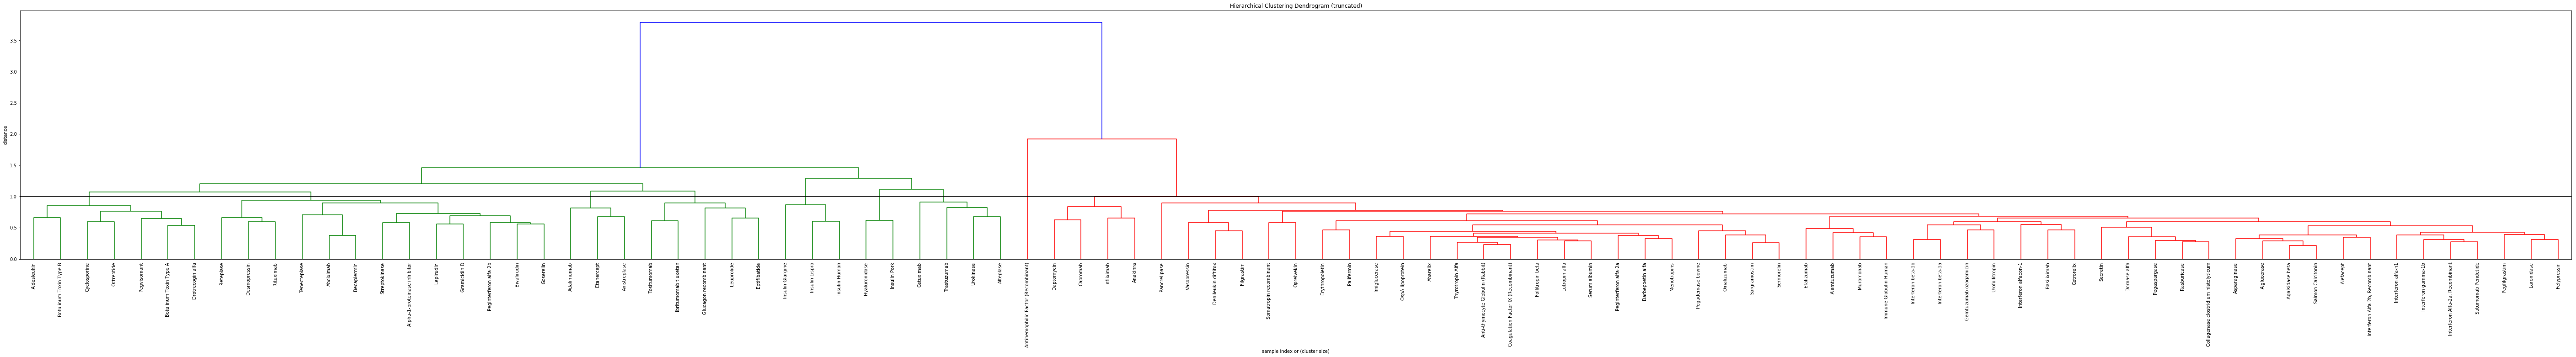

In [7]:
plt.figure(figsize=(100, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_32_4_2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=512,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    labels = labels,
)
plt.axhline(y=max_d, c='k')
plt.show()